# General
This notebook goal is to create a general policy for every kind of speed, terrain and locomotion.

What I will need to change:

- **Terrain** quality and variety (shape and properties)
- Random **inputs** for the robot mimiking a controller
- depth of the **network**
- (optional) different way of **training** it, like evolving algorythms



# Terrain

To improve the terrain I need to:
- understand how terrain is managed in pybullet
- understand ways of randomizing it
- Test it
- Find a nice way to implement randomization during the simulation

## How terrain is managed in pybullet

There are three main ways to handle terrain in pybullet:

1. **Infinite Plane** (`GEOM_PLANE`): This is the most basic ground. It's a perfectly flat, infinite plane. It's great for simple tests but not for realistic scenarios.
2. **Heightfield** (`GEOM_HEIGHTFIELD`): This is the most powerful and common method for creating complex, realistic terrains. A heightfield is essentially a 2D grid where each point's value represents the height of the terrain at that (x, y) coordinate. Imagine a grayscale image where white is the highest peak and black is the lowest valley.
3. **Triangle Mesh** (`GEOM_MESH`): If you have a terrain model created in 3D software (like Blender) and saved as a file (e.g., .obj, .stl), you can load it directly. This is great for highly specific, non-grid-based terrains but can be less performant than a heightfield.

Questions: are this the only ways to handle terrain in pybullet?

In any case we will use heightfield because is the most efficient and easily randomizable method of the three.

### Heightfield


#### Step 1: Setting Up the Environment
First, we need to import the necessary libraries and connect to the PyBullet physics engine. We will need:

- *pybullet* for the simulation itself.
- *numpy* to create and manipulate the numerical data for our heightfield.
- *time* to run the simulation at a human-viewable speed.
We will connect to PyBullet using pybullet.GUI, which will open a window to visualize the simulation.

In [ ]:
import pybullet
import numpy as np
import time

# Connect to the physics server. The GUI option opens a visualization window.
# If you want to run it without a window (e.g., for training), you can use pybullet.DIRECT.
physics_client_id = pybullet.connect(pybullet.GUI)

# Set a gravitational force.
pybullet.setGravity(0, 0, -9.81)

print(f"Connected to PyBullet with client ID: {physics_client_id}")

pybullet build time: May  8 2025 04:00:00


startThreads creating 1 threads.
starting thread 0
Connected to PyBullet with client ID: 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Microsoft Corporation
GL_RENDERER=D3D12 (NVIDIA GeForce RTX 3060 Laptop GPU)
GL_VERSION=4.6 (Core Profile) Mesa 25.0.7-0ubuntu0.24.04.2
GL_SHADING_LANGUAGE_VERSION=4.60
pthread_getconcurrency()=0
Version = 4.6 (Core Profile) Mesa 25.0.7-0ubuntu0.24.04.2
Vendor = Microsoft Corporation
Renderer = D3D12 (NVIDIA GeForce RTX 3060 Laptop GPU)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started


ven = Microsoft Corporation
ven = Microsoft Corporation


#### Step 2: Generating the Heightfield Data
We will use NumPy to create a 2D grid of height values. To start, let's make a simple ramp. This will help you visualize how the data corresponds to the shape in the simulation.

1. **Define Dimensions**: We'll specify the number of rows and columns for our terrain grid.
2. **Create a 2D Array**: We'll create a 2D NumPy array and fill it with values that increase along one axis to form a ramp.
3. **Flatten the Array**: The PyBullet function we will use later expects a 1D list of all the height values, not a 2D grid. So, we'll convert our 2D array into a 1D list.


In [ ]:
num_rows = 5
num_columns = 5
height_max = 2
height_min = 0

heightmap_2d = np.zeros((num_rows, num_columns))

height_current = height_min
for i in range(0, num_columns):
    heightmap_2d[:, i] = height_current
    height_current += (height_max-height_min)/(num_columns-1)

heightmap_2d

array([[0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ]])

TypeError: FigureBase.colorbar() missing 1 required positional argument: 'mappable'

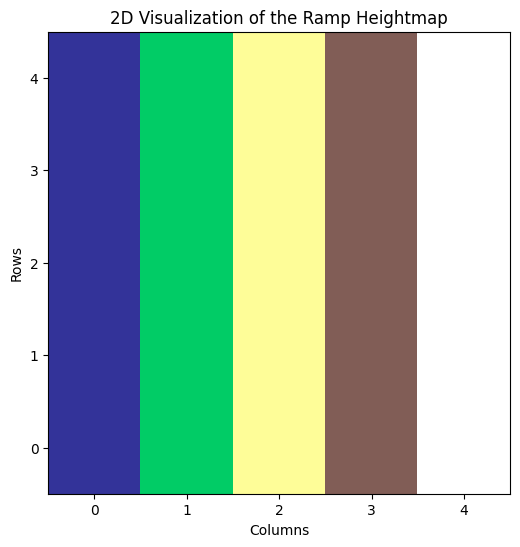

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(heightmap_2d, cmap="terrain", origin="lower")
ax.set_title("2D Visualization of the Ramp Heightmap")
ax.set_xlabel("Columns")
ax.set_ylabel("Rows")
# 2. Create a colorbar for the figure, linked to our image 'im'.
# We can also give the colorbar its own label.
fig.colorbar(ax=ax, label="Height")

plt.show()